In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\gas_source')
df = pd.read_csv('Final_Gas_Emission.csv')

In [28]:
country = df.copy()
country.head()

,Unnamed: 0,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,Somme
0,0,Afghanistan,CAIT,Total excluding LUCF,CO2,MtCO₂e,7.44,7.38,7.39,7.99,...,1.05,1.10,1.18,1.25,1.30,1.36,1.43,2.74,2.96,229.16
1,12,Angola,CAIT,Total excluding LUCF,CO2,MtCO₂e,27.34,30.84,35.41,35.16,...,11.37,11.73,11.41,10.78,6.69,6.90,6.37,6.53,6.33,1131.34
2,24,Albania,CAIT,Total excluding LUCF,CO2,MtCO₂e,5.56,5.60,4.93,5.07,...,1.80,1.48,1.97,1.95,2.14,2.07,2.24,4.11,6.05,223.04
3,36,Andorra,CAIT,Total excluding LUCF,CO2,MtCO₂e,0.46,0.47,0.47,0.47,...,0.49,0.47,0.45,0.43,0.41,0.41,0.41,0.41,0.41,28.20
4,40,United Arab Emirates,CAIT,Total excluding LUCF,CO2,MtCO₂e,200.30,208.25,199.46,194.04,...,83.85,81.45,75.81,72.64,68.29,62.15,59.64,61.50,55.40,7113.66


In [29]:
country=country[['Country', 'Gas', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995'
       ]]

df4=country.pivot_table(index=['Country'], columns='Gas')
country=df4.stack(0)
country=pd.DataFrame(country.to_records())
country.rename(columns={'level_0':'Year'},inplace = True)
del country['index']

KeyError: 'index'

In [30]:
country.head()

,Country,Year,CO2,F-Gas,N2O
0,Afghanistan,1995,1.25,0.02,3.06
1,Afghanistan,1996,1.18,0.03,3.29
2,Afghanistan,1997,1.10,0.05,3.59
3,Afghanistan,1998,1.05,0.06,3.88
4,Afghanistan,1999,0.82,0.08,4.15


In [31]:
df5=country.groupby('Year').sum()
df5=pd.DataFrame(df5.to_records())

In [33]:
country

,Country,Year,CO2,F-Gas,N2O
0,Afghanistan,1995,1.25,0.02,3.06
1,Afghanistan,1996,1.18,0.03,3.29
2,Afghanistan,1997,1.10,0.05,3.59
3,Afghanistan,1998,1.05,0.06,3.88
4,Afghanistan,1999,0.82,0.08,4.15
...,...,...,...,...,...
4675,Zimbabwe,2014,12.15,0.55,5.84
4676,Zimbabwe,2015,12.40,0.60,6.49
4677,Zimbabwe,2016,10.99,0.67,6.09
4678,Zimbabwe,2017,10.23,0.73,6.28


In [37]:
os.chdir(r'C:\Users\lilie\GitHubProjects\IronEstelle\Statistically_Significant_Insights\cleaned_data')
country.to_csv('df_all_gaz.csv', index = False)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

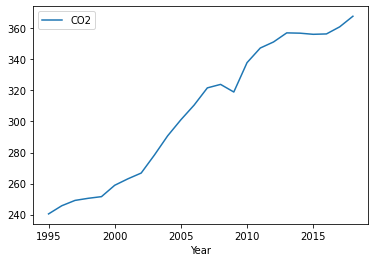

In [41]:
country[['Year','CO2']].groupby('Year').mean().plot()